# Getting Started with Machine Learning

* Instructor: [Saber Taghvaeeyan](https://www.linkedin.com/in/saber-taghvaeeyan-bb285739/)

## Agenda

1. Machine Learning Workflow
1. Jupyter environment
1. Download sample dataset
1. Data pre-processing
1. Training a model
1. Testing the model
1. What to try next

We will end with time for questions.

## 1. Machine Learning Workflow
Following figure shows the the machine learning ecosystem at a high-level.

![ml-eco](./doc/media/ml-eco.png)

In this tutorial, our focus will be on the development phase.

The development phase is outlined in the following figure.

![ml-dev](./doc/media/ml-dev.png)

## 2. Jupyter environment
Let's start by a quick review of the jupyter environment and some simple tricks.

In [1]:
# Use this cell for some simple commands.
# Press ctrl+enter to execute a cell
# Use shift+enter to execute a cell and move on to the next cell
a = 1
b = 2

# Print the sum: a+b
print('a + b is')
print(a + b)

a + b is
3


## 3. Download sample dataset
We will download a sample data set. The dataset we will be using is "Appliances Energy Prediction Dataset".

Here is more information about his data set.
https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

**Attribute Information:**

| Name | Description | Units |
| ---      |  ------  |---------:|
| date   | year-month-day   | hour:minute:second   |
| Appliances   | energy use | Wh |
| lights | energy use of light fixtures in the house | Wh |
| T1 | temperature in kitchen area | C | 
| RH_1 | humidity in kitchen area | % | 
| T2 | Temperature in living room area | C |
| RH_2 | Humidity in living room area | % | 
| T3 | Temperature in laundry room area | C |
| RH_3 | Humidity in laundry room area | % |
| T4 | Temperature in office room | C |
| RH_4 | Humidity in office room | C |
| T5 | Temperature in bathroom | C |
| RH_5 | Humidity in bathroom | % |
| T6 | Temperature outside the building (north side) | C |
| RH_6 | Humidity outside the building (north side) | % |
| T7 | Temperature in ironing room | C |
| RH_7 | Humidity in ironing room | % |
|T8 | Temperature in teenager room 2 | C |
| RH_8 | Humidity in teenager room 2 | % |
| T9 | Temperature in parents room | C |
| RH_9 | Humidity in parents room | % |
| To | Temperature outside (from Chievres weather station) | C |
| Press_mm_hg | Pressure (from Chievres weather station) | mm Hg | 
| RH_out | Humidity outside (from Chievres weather station) | % |
| Windspeed | Wind speed (from Chievres weather station) | m/s |
| Visibility | Visibility (from Chievres weather station) | km |
| Tdewpoint | Tdewpoint (from Chievres weather station) | Â°C | 
| rv1 | Random variable 1 | nondimensional | 
| rv2 | Random variable 2 | nondimensional | 

### A. Download the data as a DataFrame 
We can download the data directly from a web address using Pandas and put it into a DataFrame. 

In [2]:
import pandas as pd

# Let's get a sample dataset as a pandas dataframe, this dataset has some missing values.
df = pd.read_csv("energydata_missing.csv")

# Alternatively, we can directly download it from the web
# df = pd.read_csv("https://github.com/LuisM78/Appliances-energy-prediction-data/raw/master/energydata_complete.csv")

# Print a few rows of the data, complete the following line:
df.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60.0,30.0,19.89,47.596667,19.2,44.79,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.693333,19.2,NaN,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.300000,19.2,NaN,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,19.89,46.066667,19.2,NaN,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.333333,19.2,NaN,19.79,45.000000,NaN,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### B. Get some information about the dataset
We can leverage some of the internal *methods* of a DataFrame to gain more insight about our dataset

In [3]:
# How many samples do we have in this data set? Complete the following line
print('Total number of samples: ', df.shape[0])
print('')

# Get dataset initial stats, anything interesting? For example, are counts the same for all columns?
print("Dataset stats: ")
df.describe()


Total number of samples:  19735

Dataset stats: 


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19716.000000,19722.000000,19708.000000,19707.000000,19714.000000,19704.000000,19706.000000,19686.000000,19668.000000,19714.000000,...,19685.000000,19694.000000,19670.000000,19694.000000,19694.000000,19699.000000,19728.000000,19657.000000,19735.000000,19735.000000
mean,97.718604,3.793733,21.687989,40.262840,20.340321,40.419205,22.268089,39.242378,20.854447,39.023331,...,19.488847,41.548540,7.417952,755.529337,79.766223,4.038149,38.336501,3.761552,24.988033,24.988033
std,102.547511,7.924882,1.606444,3.976234,2.192741,4.071993,2.006732,3.252000,2.044835,4.340818,...,2.012390,4.152631,5.317312,7.403829,14.886177,2.452506,11.792966,4.190529,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.348929,18.790000,37.890000,20.790000,36.900000,19.510714,35.530000,...,18.033333,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.545000,20.633333,38.400000,...,19.390000,40.900000,6.933333,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.138333,...,20.600000,44.326667,10.416667,760.950000,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### C. Visualize the data
We can use `matplotlib` module to plot and visualize our data.

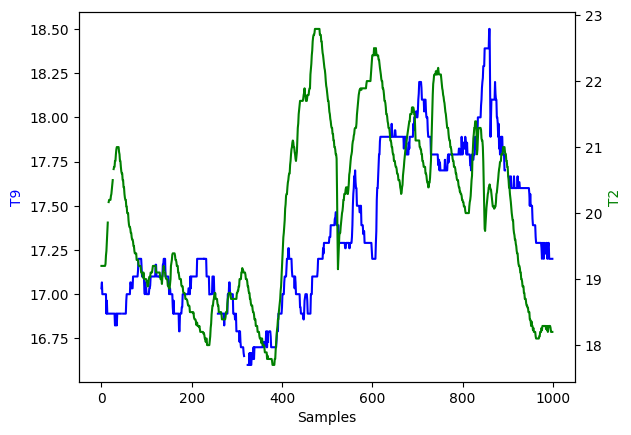

In [4]:
# Let's visualize some of the data
import matplotlib.pyplot as plt

n_samples = 1000
feature_name = "T9"
target_name = "T2"

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df[feature_name].values[:n_samples], 'b-')
ax2.plot(df[target_name].values[:n_samples], 'g-')
ax1.set_xlabel('Samples')
ax1.set_ylabel(feature_name, color='b')
ax2.set_ylabel(target_name, color='g')
plt.show()

## 4. Data pre-processing
Most of the time, the data needs to be *prepared* to be used for developing machine learning models. The preperation might include dealing with missing data or data normalization.  We go over some of the basic steps in this section.

### A. Create input and output
We should extract the inputs (i.e. *data*) and outputs (i.e. *target*) from the dataframe. We will use the living room temperature as the target. We will use a subset of all the available features to speed up training.
We will also exclude some of other temperatures as they may be very correlated with the living room temperature.

In [5]:
features_to_use = ["lights", # energy use of light fixtures in the house in Wh
                   "T4", # Temperature in office room, in Celsius
                   "T6", # Temperature outside the building (north side), in Celsius
                   "T7", # Temperature in ironing room , in Celsius
                   "T8", # Temperature in teenager room 2, in Celsius
                   "T9", # Temperature in parents room, in Celsius
                   "T_out", # Temperature outside (from Chievres weather station), in Celsius
                   "Press_mm_hg", # (from Chievres weather station), in mm Hg
                   "RH_out", # Humidity outside (from Chievres weather station), in %
                   "Windspeed", # Windspeed (from Chievres weather station), in m/s
                   "Visibility", # Visibility (from Chievres weather station), in km
                   "Tdewpoint" # Dew point (from Chievres weather station), Â°C
                  ]
target_name = "T2"

# Create a new dataframe with our desired columns
col_names = features_to_use + [target_name]
df_ml = df[col_names].copy()

# Check the stats of the new dataframe
df_ml.describe()

,lights,T4,T6,T7,T8,T9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,T2
count,19722.000000,19668.000000,19662.000000,19675.000000,19681.000000,19685.000000,19670.000000,19694.000000,19694.000000,19699.000000,19728.000000,19657.000000,19714.000000
mean,3.793733,20.854447,7.924855,20.267806,22.026976,19.488847,7.417952,755.529337,79.766223,4.038149,38.336501,3.761552,20.340321
std,7.924882,2.044835,6.085209,2.109790,1.957094,2.012390,5.317312,7.403829,14.886177,2.452506,11.792966,4.190529,2.192741
min,0.000000,15.100000,-6.065000,15.390000,16.306667,14.890000,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,16.100000
25%,0.000000,19.510714,3.632976,18.700000,20.790000,18.033333,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,18.790000
50%,0.000000,20.633333,7.300000,20.033333,22.100000,19.390000,6.933333,756.100000,83.666667,3.666667,40.000000,3.433333,20.000000
75%,0.000000,22.100000,11.262500,21.600000,23.390000,20.600000,10.416667,760.950000,91.666667,5.500000,40.000000,6.566667,21.500000
max,70.000000,26.200000,28.290000,26.000000,27.230000,24.500000,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,29.856667


In [6]:
# How much data is missing for each column?
df_stat = df.describe()
df_stat.loc["count"]/df.shape[0]

Appliances     0.999037
lights         0.999341
T1             0.998632
RH_1           0.998581
T2             0.998936
RH_2           0.998429
T3             0.998531
RH_3           0.997517
T4             0.996605
RH_4           0.998936
T5             0.999139
RH_5           0.997061
T6             0.996301
RH_6           0.996200
T7             0.996960
RH_7           0.994071
T8             0.997264
RH_8           0.996048
T9             0.997466
RH_9           0.997922
T_out          0.996706
Press_mm_hg    0.997922
RH_out         0.997922
Windspeed      0.998176
Visibility     0.999645
Tdewpoint      0.996048
rv1            1.000000
rv2            1.000000
Name: count, dtype: float64

#### Handling Missing Values

We have missing values in our dataset. There are several options we can consider:
1) Remove missing values from our dataset.
2) Fill in missing values with information from the individual columns, for example mean. (**Univariate feature imputation**)
4) Fill in the missing values with information from other columns (**Multivariate feature imputation**).
5) Use ML algorithms that can handle missing values, like `RandomForestRegressor`.

Each method has its pros and cons. We will show a demo of options 1 and 3 in this tutorial.

In [7]:
# Remove rows that have missing values
df_ml_clean = df_ml.dropna(how="any", axis=0)

# Check how much data we have lost.
ratio = 100*(1 - df_ml_clean.shape[0]/df_ml.shape[0])
print(f"Percent of samples removed: {ratio: 0.3}%")

Percent of samples removed:  2.68%


#### Handling Missing Values

If the above percentage is small, we can move on. But if it is significant, it is better to try one of the other methods for handling missing data.

Next, we will show how to use MICE as a multivariate feature imputation technique.

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create an instance of the Imputer to use
imp = IterativeImputer(max_iter=5, random_state=0)
# Fit imputer
imp.fit(df_ml)
# Transform data using the fitter imputer to fill in the missing values
clean_data = imp.transform(df_ml)
# Create a new dataframe with imputed data
df_ml_clean = pd.DataFrame(columns=df_ml.columns, data=clean_data)

# Check how much data we have lost.
ratio = 100*(1 - df_ml_clean.shape[0]/df_ml.shape[0])
print(f"Percent of samples removed: {ratio: 0.3}%")

Percent of samples removed:  0.0%


#### Handling missing values

Now that we have discussed handling missing data, we will create input (data) and output (target) for our model training.

In [9]:
# Create input data
data = df_ml_clean[features_to_use]
# Create target data
target = df_ml_clean[target_name]

### B. Split the data into train, test, validation
For training a model and evaluating the performance, we devide the model into train, validation, and test sets. 

We will use the training and validation set to design the architecture, train the model, and optimize the hyperparameters. Then use the test set to report the accuracy.

In [10]:
# Import Scikit-learn data splitting functions, complete the following line
from sklearn.model_selection import train_test_split

# Determine train test splits
test_ratio = 0.2

# Split the data into training and testing
x_trn, x_tst, y_trn, y_tst = train_test_split(data, target, test_size=test_ratio, shuffle=True, random_state=0)

# Split the training data into training and validation
x_trn, x_vld, y_trn, y_vld = train_test_split(x_trn, y_trn, test_size=test_ratio, shuffle=True, random_state=0)

# Print how many samples we have in each set, complete the following lines
print("Number of samples in the training set: ", x_trn.shape[0])
print("Number of samples in the validation set: ", x_vld.shape[0])
print("Number of samples in the test set: ", x_tst.shape[0])

Number of samples in the training set:  12630
Number of samples in the validation set:  3158
Number of samples in the test set:  3947


### C. Normalize the Data

Most of the time, we should \"prepare\" our data and make it ready for model development. The preperation might include 
- proper formatting
- handling missing data
- converting categorical to numerical values
- normalization

Here, we only need to normalize the data since the other items are not applicable or have been addressed. Can you explain why we need to normalize the data?

In [11]:
# Normalize the data, complete the following lines
mean = x_trn.mean()
std = x_trn.std()
x_trn = (x_trn - mean)/std
x_vld = (x_vld - mean)/std
x_tst = (x_tst - mean)/std

## 5. Training a model
Now that we have prepared the data and split it into train, validation, and test sets, we can train ML models.

Several different models are available from scikit-learn. We will start with a basic linear regression model. But, we will also look at other regressors as well.

In [12]:
# Import requried packages
import numpy as np
# from sklearn.linear_model import LinearRegression

# We will try ExtraTrees after testing the base linear regressor
from sklearn.ensemble import ExtraTreesRegressor

# Create an instance of the model, complete the following line
# regr = LinearRegression()
regr = ExtraTreesRegressor(max_depth=15, random_state=0)

# Train the model, complete the following line
regr.fit(x_trn, y_trn)

# Calculate the training error and print, completet the following lines
y_trn_prd = regr.predict(x_trn)
trn_error = np.mean(np.abs(y_trn - y_trn_prd))
print("Training Error: {:.3f} \n".format(trn_error))

# Calculate the validation error, complete the following lines
y_vld_prd = regr.predict(x_vld)
vld_error = np.mean(np.abs(y_vld - y_vld_prd))
print("Validation Error: {:.3f}".format(vld_error))

Training Error: 0.112 

Validation Error: 0.171


## 6. Testing the model
Once we have trained the model, and have finalized the parameters, we can see how it performs on out test set.

In [13]:
# Once we we have decided on the parameters, we can print the test error
y_tst_prd = regr.predict(x_tst)
tst_error = np.mean(np.abs(y_tst - y_tst_prd))
print("Test Error: {:.3f}".format(tst_error))

Test Error: 0.172


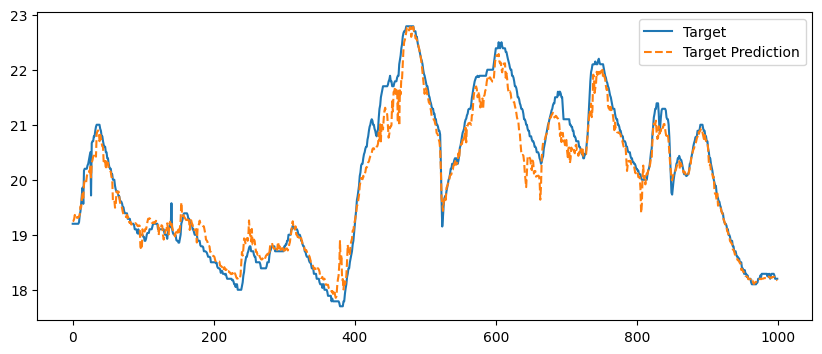

In [14]:
# Making prediciton on a new data sample
target_prd = regr.predict((data-mean)/std)
samples_to_plot = 1000
plt.figure(figsize=(10, 4))
plt.plot(target[:samples_to_plot], label='Target')
plt.plot(target_prd[:samples_to_plot], "--", label='Target Prediction')
plt.legend()
plt.show()

In [15]:
# We can also take a look at the feature_importance. It basically shows how much each feature contributes to the final
# prediction. 
feature_imp_df = pd.DataFrame(data={"Name": features_to_use, "Importance": regr.feature_importances_})
display(feature_imp_df)

,Name,Importance
0,lights,0.006825
1,T4,0.204149
2,T6,0.274227
3,T7,0.081398
4,T8,0.041396
5,T9,0.067924
6,T_out,0.218142
7,Press_mm_hg,0.031019
8,RH_out,0.019118
9,Windspeed,0.022200


## 7. What to try next
You can read about the following topics if you like to further pursue this topic:
- Try this pipeline with other datasets
- Try the model without normalization and see if it affects the result
- Read about and try other types of regressors in scikitlearn (`SVR`, `GradientBoostingRegressor`, `ExtraTreesRegressor`)
- Read and try neural network based approaches (`ANN`, `RNN`, `CNN`)